<a href="https://colab.research.google.com/github/benigmatic/Machine-learning-and-Data-vizualization/blob/main/Saver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import of the libraries
import pandas as pd
import nltk   
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

In [2]:
#upload both datasets
skills_df=  pd.read_csv('Example_Technical_Skills.csv')
data=  pd.read_csv('Raw_Skills_Dataset.csv')
skills_df.head(5)

,Technology Skills
0,SAP Fiori Developer
1,Oracle Instance Management & Strategy
2,Boomi Master Data Management
3,Digital Manufacturing on Cloud ( DMC)
4,DevOps


In [3]:
#Check if there are dublicated in the dataset
print(data["RAW DATA"].is_unique)
print(data.shape)

False
(34116, 1)


In [4]:
#dropping the dublicates (almost half was removed)
data = data.drop_duplicates()
print(data.shape)

(15677, 1)


In [5]:
#Checks if there are any missing values in the dataset
data.isnull().sum()
#No empty rows with missing data

RAW DATA    0
dtype: int64

In [6]:
#Separate the Technological skills
skills_data = []
skills= list(skills_df["Technology Skills"])
 

In [7]:
#tokenize the skills. Remove the numbers punctuation
for i in skills:
  clean = re.sub(r"[^A-Za-z0-9\s]+", "", i)
  for j in word_tokenize(str(clean)):
    
    if len(j) >=2:
      skills_data.append(j.lower())    
print(skills_data)

['sap', 'fiori', 'developer', 'oracle', 'instance', 'management', 'strategy', 'boomi', 'master', 'data', 'management', 'digital', 'manufacturing', 'on', 'cloud', 'dmc', 'devops', 'ca', 'sam', 'openshift', 'acxiom', 'data', 'analytics', 'sap', 'digital', 'boardroom', 'seeburger', 'bis', 'sap', 'transport', 'management', 'peoplesoft', 'workflow', 'nice', 'actimize', 'oracle', 'access', 'manager', 'sap', 'electronic', 'data', 'interchange', 'edi', 'ideas', 'crowdsourcing', 'peoplesoft', 'workforce', 'planning', 'sap', 'benefits', 'onesource', 'rd', 'credit', 'manager', 'sap', 'consignment', 'ms', 'bot', 'framework', 'ibm', 'websphere', 'application', 'server', 'microsoft', 'azure', 'ad', 'domain', 'services', 'sap', 'ibp', 'bpc', 'oracle', 'hyperion', 'capital', 'asset', 'planning', 'sap', 'introscope', 'wily', 'ejb', 'rmi', 'sas', 'base', 'siebel', 'modules', 'non', 'functional', 'testing', 'oracle', 'cloud', 'product', 'hub', 'data', 'steward', 'kronos', 'wfc', 'accruals', 'configuratio

In [8]:
#remove dublicates
skills_data = list(set(skills_data))
nltk.download("stopwords")

stopwords_ = set(stopwords.words("english"))
#Added some stopwords mannualy based on the given Raw and skills dataset differences
manual = ['our', 'i.e', 'assurance','skills', 'experience','development']
#remove stopwords from tokens so that only the most important words count
clean_tokens = [t for t in skills_data if not t in stopwords_ and manual]

['profitabilitycost', 'antimoney', 'upgrade', 'jcs', 'idaas', 'insurance', 'foundat', 'sls', 'iq', 'labs', 'tuning', 'monitoring', 'dct', 'designing', 'openshift', 'analysis', 'enterprise', 'ag', 'gateways', 'qlik', 'adaptable', 'cyber', 'privacy', 'activetransfer', 'grc', 'sign', 'commission', 'businessobjects', 'technology', 'crystal', 'oozie', 'octopus', 'globalview', 'refx', 'planning', 'qradar', 'response', 'reference', 'webservices', 'communities', 'qualiac', 'mck', 'persistent', 'custom', 'scikitlearn', 'websphere', 'cdn', 'fusinv', 'life', 'mckesson', 'governortcg', 'outils', 'ssas', 'thingworx', 'flow', 'cont', 'rsa', 'dc', 'model', 'wfc', 'americanmedicalassocama', 'consignment', 'nerc', 'exadata', 'bluetooth', 'redis', 'online', 'edition', 'chrome', 'edi', 'dw', 'check', 'benefits', 'unified', 'brfplus', 'solution', 'paas', 'spclst', 'config', 'md', 'social', 'itbm', 'architecture', 'wily', 'gulp', 'consul', 'hcm', 'human', 'cpids', 'ppm', 'population', 'semantic', 'domain',

In [9]:
#Compare Raw data with tokens. If Raw data match with the tokens, leave it in the data set, otherwise remove
res = []
for i in data["RAW DATA"]:
  for keyword in clean_tokens:
    for word in i.split():
      if(keyword== word  and word not in manual):
            res.append(i)
print(res)

['Object Oriented analysis', 'code versioning tools', 'code versioning tools', 'continuous integration', 'continuous delivery development processes', 'frameworks', 'analytical reporting', 'conceptual data models', 'standard naming conventions', 'high throughput data access services', 'high throughput data access services', 'high throughput data access services', 'analyze/profile data', 'conceptual, logical & physical data model designs', 'conceptual, logical & physical data model designs', 'conceptual, logical & physical data model designs', 'reporting and analytics solutions', 'reporting and analytics solutions', 'physical databases', 'integrations', 'logical and physical data models', 'logical and physical data models', 'modern enterprise data architectures', 'modern enterprise data architectures', 'modern enterprise data architectures', 'data toolsets', 'e.g.: data warehouse', 'e.g.: data warehouse', 'data marts', 'modeling tools', 'modeling tools', 'profiling tools', 'Scala program

In [10]:

res = list(set(res))
print(res)

['Administered cloud service infrastructure', 'the Splunk products', 'well-designed, testable, efficient code', 'Microsoft Server/Workstation products', ' Good verbal and written communication', 'revision control', 'Digital channel processor specifications', 'compelling customer value', 'mentorship and code reviews', 'high quality fixes', 'stack technologies', 'an ERP reporting', 'key inputs', 'advanced algorithm / model development', 'OS fundamentals', 'agile software development methodologies', 'Longform software development guides', 'Leverage experience developing software', 'team workflow', 'enhancement requests', 'new and varied technologies', 'Jest/Karma test frameworks', 'innovative tools', 'software focussed projects', 'quality SaaS products', 'the complete software development lifecycle', 'a multi-threaded, client-server application', 'other software development capabilities', 'a Lean / Agile shop', 'ongoing Active Directory security and strategy discussions', 'bug tracking', 

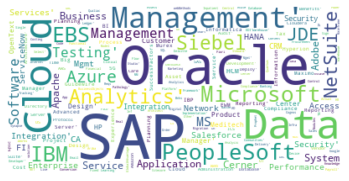

In [11]:
#Generate word clouds to identify the most common words in the sets
text = " ".join(str(cat) for cat in skills_df.values)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

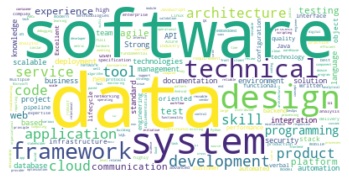

In [12]:
text = " ".join(str(cat) for cat in res)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
# transform dataframe
result_df = pd.DataFrame({'Skill': res})
print(result_df.tail(5))

                                                  Skill
5940  Excellent verbal and written communications sk...
5941                                end user's business
5942                   ServiceNow platform architecture
5943                                 PHP MVC frameworks
5944                               backend technologies


In [14]:
#Write a dataframe with cleaned Technical skills to the csv file
result_df.to_csv("/content/Result.csv")